#Q2

In [106]:
from tensorflow import keras
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Input, AveragePooling2D, Dropout

In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
# Normalize data
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

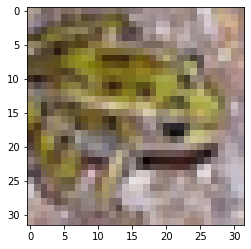

In [4]:
# Visualize data
plt.imshow(x_train[np.random.randint(len(x_train))])
plt.show()

In [5]:
# Convert class vectors to binary class matrices.
num_classes = 10
print("Y[0] before converting : " , y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("Y[0] after converting : " , y_train[0]) 

Y[0] before converting :  [6]
Y[0] after converting :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
# Fully connected model
fc_model = keras.Sequential()
fc_model.add(keras.layers.Input(shape=x_train[0].shape))
# Write your code here 
# Add Flatten layer and few Dense layers
fc_model.add(Flatten())
fc_model.add(Dense(128, activation='relu'))
fc_model.add(Dense(64, activation='relu'))
fc_model.add(Dense(32, activation='relu'))
fc_model.add(Dense(10, activation='softmax'))
fc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________


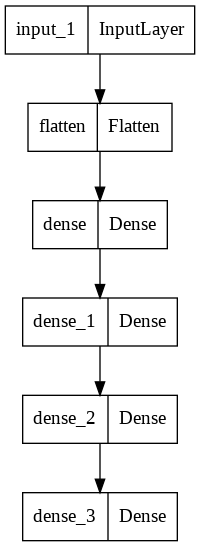

In [7]:
plot_model(fc_model)

In [14]:
Conv_model = Sequential()
Conv_model.add(keras.layers.Input(shape=x_train[0].shape))
# write your code here
# add few Conv layers and Flatten layer
# you can use pool layers after Conv
Conv_model.add(Conv2D(32, (3,3), activation='relu'))
Conv_model.add(MaxPooling2D((2, 2)))
Conv_model.add(Conv2D(128, (3,3), activation='relu'))
Conv_model.add(Conv2D(64, (3,3), activation='relu'))
Conv_model.add(Flatten())
Conv_model.add(Dense(10, activation='softmax'))
Conv_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 128)       36992     
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 flatten_3 (Flatten)         (None, 7744)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                77450     
                                                      

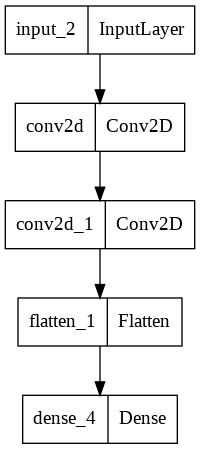

In [9]:
plot_model(Conv_model)

In [15]:
models_name = {}
models_name[0] = 'Fully Connected Model'
models_name[1] = 'Convolutional Model'

for i, model in enumerate([fc_model, Conv_model]):
    print(models_name[i])
    plot_model(model)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=2e-3),
        metrics=['accuracy'] 
    )   
    model.fit(x_train, y_train, epochs=5)
    print('\n')
    print('Loss and Accuracy on Test set : ')
    model.evaluate(x_test, y_test)
    print('\n')


Fully Connected Model
Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6095 - accuracy: 0.4221
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5928 - accuracy: 0.4263
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5791 - accuracy: 0.4324
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5655 - accuracy: 0.4386
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5573 - accuracy: 0.4401


Loss and Accuracy on Test set : 
313/313 [==============================] - 1s 3ms/step - loss: 1.5680 - accuracy: 0.4409


Convolutional Model
Epoch 1/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4966 - accuracy: 0.4602
Epoch 2/5
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1616 - accuracy: 0.5896
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0167 - accuracy: 0.6445
Epoch 4/5
1563/1563 [===

#Q3

In [94]:
import tensorflow as tf
import cv2
import os 
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tensorflow.keras.applications.resnet50 import ResNet50

In [95]:
!rm -r sample_data

rm: cannot remove 'sample_data': No such file or directory


In [96]:
!gdown "1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Y2CM201yphBcdovvheDkEn9Bzu6IXeUZ&confirm=t
To: /content/fruits-360-original-size.zip
100% 579M/579M [00:02<00:00, 252MB/s]


In [97]:
!unzip fruits-360-original-size.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_96.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r0_98.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_0.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_10.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_100.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_102.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_104.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_106.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_108.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_110.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_112.jpg  
  inflating: fruits-360-original-size/Training/apple_red_yellow_1/r1_114.jpg  
  infl

## A : complete resize image

In [98]:
BASE_PATH = '/content/fruits-360-original-size/'

# path to the train folder
DATA_TRAIN_PATH = os.path.join(BASE_PATH, 'Training')

# path to the test folder 
DATA_TEST_PATH = os.path.join(BASE_PATH, 'Test')

In [99]:
def resize_img(img, desired_size = 224):
    # write your code here
    old_size = img.shape[:2]
    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    image = cv2.resize(img, (new_size[1], new_size[0]))
    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)
    color = [0, 0, 0]
    new_im = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)
    return new_im

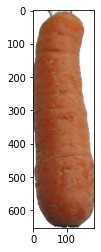

In [100]:
path = '/content/fruits-360-original-size/Training/carrot_1/r0_136.jpg'
img = cv2.imread(path)[:,:,::-1]
plt.imshow(img)
plt.show()

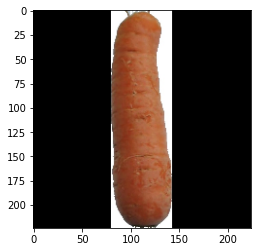

In [101]:
new_img = resize_img(img)
plt.imshow(new_img)

## Image Data generator

In [102]:
import tensorflow.keras.preprocessing.image as IM

train_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

test_datagen = IM.ImageDataGenerator(rescale=1./255,
    preprocessing_function=resize_img)

train_generator  = train_datagen.flow_from_directory(DATA_TRAIN_PATH,batch_size=96,target_size=(224,224))
test_generator  = test_datagen.flow_from_directory(DATA_TEST_PATH,batch_size=96,target_size=(224,224))

Found 6231 images belonging to 24 classes.
Found 3110 images belonging to 24 classes.


## B : Resnet50 with random weigts

In [107]:
# YOU CAN CHANGE IT
EPOCHS = 30

In [104]:
resnet = tf.keras.models.Sequential()
# Write your code here
base_model = ResNet50(weights= None, include_top=False, input_shape= (224, 224, 3))
resnet.add(base_model)
resnet.add(Flatten())
resnet.add(Dense(24, activation='softmax'))
resnet.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_17 (Flatten)        (None, 100352)            0         
                                                                 
 dense_30 (Dense)            (None, 24)                2408472   
                                                                 
Total params: 25,996,184
Trainable params: 25,943,064
Non-trainable params: 53,120
_________________________________________________________________


In [127]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [128]:
resnet.fit(train_generator, epochs=3)

Epoch 1/3
65/65 [==============================] - 69s 987ms/step - loss: 15.6880 - acc: 0.2032
Epoch 2/3
65/65 [==============================] - 65s 999ms/step - loss: 3.2720 - acc: 0.5839
Epoch 3/3
65/65 [==============================] - 65s 992ms/step - loss: 2.2978 - acc: 0.8848


## C : Fine-tune Resnet50 on fruits dataset.

In [123]:
fine_tune_resnet = tf.keras.models.Sequential()
# write your code here 
baseModel = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
fine_tune_resnet.add(baseModel)
baseModel.trainable = False
fine_tune_resnet.add(Flatten())
fine_tune_resnet.add(Dense(256, activation="relu"))
fine_tune_resnet.add(Dense(128, activation='relu'))
fine_tune_resnet.add(Dense(24, activation="softmax"))
fine_tune_resnet.summary()


Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_24 (Flatten)        (None, 100352)            0         
                                                                 
 dense_46 (Dense)            (None, 256)               25690368  
                                                                 
 dense_47 (Dense)            (None, 128)               32896     
                                                                 
 dense_48 (Dense)            (None, 24)                3096      
                                                                 
Total params: 49,314,072
Trainable params: 25,726,360
Non-trainable params: 23,587,712
_________________________________________________________________


In [124]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
fine_tune_resnet.compile(loss= loss, optimizer= optimizer, metrics="acc")

In [125]:
fine_tune_resnet.fit(train_generator, epochs=3)

Epoch 1/3
65/65 [==============================] - 98s 552ms/step - loss: 3.3244 - acc: 0.3550
Epoch 2/3
65/65 [==============================] - 34s 527ms/step - loss: 0.7859 - acc: 0.8013
Epoch 3/3
65/65 [==============================] - 34s 527ms/step - loss: 0.4130 - acc: 0.8918


## Test models

In [129]:
resnet.evaluate(test_generator)

33/33 [==============================] - 18s 508ms/step - loss: 8.2649 - acc: 0.1026


[8.264884948730469, 0.10257234424352646]

In [126]:
fine_tune_resnet.evaluate(test_generator)

33/33 [==============================] - 18s 515ms/step - loss: 0.3040 - acc: 0.9322


[0.30396291613578796, 0.9321543574333191]